# Análise de Dados e ETL, utilizando **ibis** com MySQL

## Bibliotecas necessárias

In [ ]:
# Instalando libs necessárias
%pip install -q 'ibis-framework[mysql]'
%pip install -q cryptography

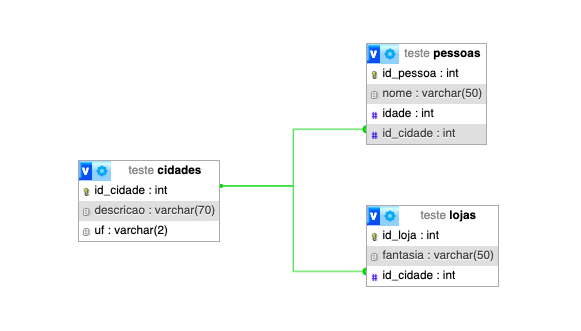

## Conectando no database MySQL

In [2]:
import ibis
ibis.options.interactive = True
con = ibis.mysql.connect(
    user="teste",
    password="teste",
    host="localhost",
    port=3307,
    database="teste",
)

## Manipulando as tabelas MySQL

In [13]:
# Tabelas existente na 
con.list_tables()

['cidades', 'lojas', 'pessoas']

In [4]:
# criando o objeto ibis cidades com os dados da tabela cidades
cidades = con.sql("select * from cidades")
cidades

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┓
┃ id_cidade ┃ descricao ┃ uf      ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━┩
│ !int32    │ !string   │ !string │
├───────────┼───────────┼─────────┤
│         1 │ CIDADE A  │ UA      │
│         2 │ CIDADE B  │ UB      │
│         3 │ CIDADE C  │ UC      │
│         4 │ CIDADE D  │ UD      │
│         5 │ CIDADE E  │ UE      │
└───────────┴───────────┴─────────┘

In [9]:
# criando o objeto ibis lojas com os dados da tabela lojas
lojas = con.sql("select * from lojas")
lojas

┏━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ id_loja ┃ fantasia ┃ id_cidade ┃
┡━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
│ !int32  │ !string  │ !int32    │
├─────────┼──────────┼───────────┤
│       1 │ LOJA 1   │         1 │
│       2 │ LOJA 2   │         2 │
└─────────┴──────────┴───────────┘

In [5]:
# criando o objeto ibis pessoas com os dados da tabela pessoas
pessoas = con.sql("select * from pessoas")
pessoas

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ id_pessoa ┃ nome      ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !int32    │ !string   │ !int32 │ !int32    │
├───────────┼───────────┼────────┼───────────┤
│         1 │ PESSOA 1  │     11 │         1 │
│         2 │ PESSOA 2  │     22 │         2 │
│         3 │ PESSOA 3  │     33 │         1 │
│         4 │ PESSOA 4  │     44 │         1 │
│         5 │ PESSOA 5  │     55 │         3 │
│         6 │ PESSOA 6  │     66 │         2 │
│         7 │ PESSOA 7  │     77 │         3 │
│         8 │ PESSOA 8  │     20 │         2 │
│         9 │ PESSOA 9  │     30 │         2 │
│        10 │ PESSOA 10 │     40 │         3 │
└───────────┴───────────┴────────┴───────────┘

### Selecionando Colunas

In [17]:
cidades.select('descricao')

┏━━━━━━━━━━━┓
┃ descricao ┃
┡━━━━━━━━━━━┩
│ !string   │
├───────────┤
│ CIDADE A  │
│ CIDADE B  │
│ CIDADE C  │
│ CIDADE D  │
│ CIDADE E  │
└───────────┘

In [18]:
pessoas.select('nome', 'idade')

┏━━━━━━━━━━━┳━━━━━━━━┓
┃ nome      ┃ idade  ┃
┡━━━━━━━━━━━╇━━━━━━━━┩
│ !string   │ !int32 │
├───────────┼────────┤
│ PESSOA 1  │     11 │
│ PESSOA 2  │     22 │
│ PESSOA 3  │     33 │
│ PESSOA 4  │     44 │
│ PESSOA 5  │     55 │
│ PESSOA 6  │     66 │
│ PESSOA 7  │     77 │
│ PESSOA 8  │     20 │
│ PESSOA 9  │     30 │
│ PESSOA 10 │     40 │
└───────────┴────────┘

### Filtrando os dados

In [22]:
pessoas \
    .filter(
        pessoas.idade > 40
    ).select('nome', 'idade', 'id_cidade')

┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ nome     ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !string  │ !int32 │ !int32    │
├──────────┼────────┼───────────┤
│ PESSOA 4 │     44 │         1 │
│ PESSOA 5 │     55 │         3 │
│ PESSOA 6 │     66 │         2 │
│ PESSOA 7 │     77 │         3 │
└──────────┴────────┴───────────┘

In [23]:
pessoas \
    .filter(
        (pessoas.idade > 40) &
        (pessoas.id_cidade == 3)
    ).select('nome', 'idade', 'id_cidade')

┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ nome     ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !string  │ !int32 │ !int32    │
├──────────┼────────┼───────────┤
│ PESSOA 5 │     55 │         3 │
│ PESSOA 7 │     77 │         3 │
└──────────┴────────┴───────────┘

### Ordenando os dados

In [28]:
pessoas \
    .filter(
        pessoas.idade > 40
    ).order_by(
        'id_cidade'
    ).select(
        'nome', 'idade', 'id_cidade'
    )

┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ nome     ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !string  │ !int32 │ !int32    │
├──────────┼────────┼───────────┤
│ PESSOA 4 │     44 │         1 │
│ PESSOA 6 │     66 │         2 │
│ PESSOA 5 │     55 │         3 │
│ PESSOA 7 │     77 │         3 │
└──────────┴────────┴───────────┘

In [34]:
pessoas \
    .filter(
        pessoas.idade > 40
    ).order_by(
        pessoas.idade.desc()
    ).select(
        'nome', 'idade', 'id_cidade'
    )

┏━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ nome     ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !string  │ !int32 │ !int32    │
├──────────┼────────┼───────────┤
│ PESSOA 7 │     77 │         3 │
│ PESSOA 6 │     66 │         2 │
│ PESSOA 5 │     55 │         3 │
│ PESSOA 4 │     44 │         1 │
└──────────┴────────┴───────────┘

### Funções de agregação

In [35]:
pessoas.aggregate(
    pessoas.nome.count()
)

┏━━━━━━━━━━━━━┓
┃ Count(nome) ┃
┡━━━━━━━━━━━━━┩
│ int64       │
├─────────────┤
│          10 │
└─────────────┘

In [46]:
pessoas.aggregate(
    pessoas.nome.count().name('Qtd. de Pessas')
)

┏━━━━━━━━━━━━━━━━┓
┃ Qtd. de Pessas ┃
┡━━━━━━━━━━━━━━━━┩
│ int64          │
├────────────────┤
│             10 │
└────────────────┘

In [42]:
pessoas.aggregate(
    [
        pessoas.idade.count(),
        pessoas.idade.sum(),
        pessoas.idade.min(),
        pessoas.idade.max()
    ]
)

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Count(idade) ┃ Sum(idade) ┃ Min(idade) ┃ Max(idade) ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ int64        │ int64      │ !int32     │ !int32     │
├──────────────┼────────────┼────────────┼────────────┤
│           10 │        398 │         11 │         77 │
└──────────────┴────────────┴────────────┴────────────┘

### Agrupando Dados

In [48]:
pessoas.group_by('id_cidade').aggregate()

┏━━━━━━━━━━━┓
┃ id_cidade ┃
┡━━━━━━━━━━━┩
│ !int32    │
├───────────┤
│         1 │
│         2 │
│         3 │
└───────────┘

In [43]:
# agrupando pelo id da cidade
# contando a quantidade de pessoas por cidade
pessoas.group_by('id_cidade') \
.aggregate(pessoas.id_cidade.count())

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ id_cidade ┃ Count(id_cidade) ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ !int32    │ int64            │
├───────────┼──────────────────┤
│         1 │                3 │
│         2 │                4 │
│         3 │                3 │
└───────────┴──────────────────┘

In [49]:
# colocando um label na agregação
pessoas.group_by('id_cidade') \
    .aggregate(
        pessoas.id_cidade.count().name("qtd_pessoas")
)

┏━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ id_cidade ┃ qtd_pessoas ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ !int32    │ int64       │
├───────────┼─────────────┤
│         1 │           3 │
│         2 │           4 │
│         3 │           3 │
└───────────┴─────────────┘

## Joins

In [50]:
con.list_tables()

['cidades', 'lojas', 'pessoas']

In [10]:
cidades_pessoas = cidades.left_join(
    pessoas,
    cidades.id_cidade == pessoas.id_cidade
)
cidades_pessoas

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ id_cidade ┃ descricao ┃ uf     ┃ id_pessoa ┃ nome      ┃ idade ┃ id_cidade_right ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ int32     │ string    │ string │ int32     │ string    │ int32 │ int32           │
├───────────┼───────────┼────────┼───────────┼───────────┼───────┼─────────────────┤
│         1 │ CIDADE A  │ UA     │         4 │ PESSOA 4  │    44 │               1 │
│         1 │ CIDADE A  │ UA     │         3 │ PESSOA 3  │    33 │               1 │
│         1 │ CIDADE A  │ UA     │         1 │ PESSOA 1  │    11 │               1 │
│         2 │ CIDADE B  │ UB     │         9 │ PESSOA 9  │    30 │               2 │
│         2 │ CIDADE B  │ UB     │         8 │ PESSOA 8  │    20 │               2 │
│         2 │ CIDADE B  │ UB     │         6 │ PESSOA 6  │    66 │               2 │
│         2 │ CIDADE B  │ UB     │         2 │ PESSOA 2  │    22 │               2 │
│         3 │ CIDADE C  │ UC     │        10 │ PESSOA 10 │    40 │               3 │
│         3 │ CIDADE C  │ UC     │         7 │ PESSOA 7  │    77 │               3 │
│         3 │ CIDADE C  │ UC     │         5 │ PESSOA 5  │    55 │               3 │
│         … │ …         │ …      │         … │ …         │     … │               … │
└───────────┴───────────┴────────┴───────────┴───────────┴───────┴─────────────────┘

In [12]:
# cidades com lojas
cidades_lojas = cidades.right_join(
    lojas,
    cidades.id_cidade == lojas.id_cidade
)
display(cidades_lojas)
display(cidades_lojas.select('descricao', 'fantasia'))

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ id_cidade ┃ descricao ┃ uf     ┃ id_loja ┃ fantasia ┃ id_cidade_right ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ int32     │ string    │ string │ int32   │ string   │ int32           │
├───────────┼───────────┼────────┼─────────┼──────────┼─────────────────┤
│         1 │ CIDADE A  │ UA     │       1 │ LOJA 1   │               1 │
│         2 │ CIDADE B  │ UB     │       2 │ LOJA 2   │               2 │
└───────────┴───────────┴────────┴─────────┴──────────┴─────────────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━┓
┃ descricao ┃ fantasia ┃
┡━━━━━━━━━━━╇━━━━━━━━━━┩
│ string    │ string   │
├───────────┼──────────┤
│ CIDADE A  │ LOJA 1   │
│ CIDADE B  │ LOJA 2   │
└───────────┴──────────┘

In [52]:
p1 = pessoas.filter(pessoas.idade <40)
p2 = pessoas.filter(pessoas.idade >=40)
display(pessoas)
display(p1)
display(p2)

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ id_pessoa ┃ nome      ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !int32    │ !string   │ !int32 │ !int32    │
├───────────┼───────────┼────────┼───────────┤
│         1 │ PESSOA 1  │     11 │         1 │
│         2 │ PESSOA 2  │     22 │         2 │
│         3 │ PESSOA 3  │     33 │         1 │
│         4 │ PESSOA 4  │     44 │         1 │
│         5 │ PESSOA 5  │     55 │         3 │
│         6 │ PESSOA 6  │     66 │         2 │
│         7 │ PESSOA 7  │     77 │         3 │
│         8 │ PESSOA 8  │     20 │         2 │
│         9 │ PESSOA 9  │     30 │         2 │
│        10 │ PESSOA 10 │     40 │         3 │
└───────────┴───────────┴────────┴───────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ id_pessoa ┃ nome     ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !int32    │ !string  │ !int32 │ !int32    │
├───────────┼──────────┼────────┼───────────┤
│         1 │ PESSOA 1 │     11 │         1 │
│         2 │ PESSOA 2 │     22 │         2 │
│         3 │ PESSOA 3 │     33 │         1 │
│         8 │ PESSOA 8 │     20 │         2 │
│         9 │ PESSOA 9 │     30 │         2 │
└───────────┴──────────┴────────┴───────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ id_pessoa ┃ nome      ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !int32    │ !string   │ !int32 │ !int32    │
├───────────┼───────────┼────────┼───────────┤
│         4 │ PESSOA 4  │     44 │         1 │
│         5 │ PESSOA 5  │     55 │         3 │
│         6 │ PESSOA 6  │     66 │         2 │
│         7 │ PESSOA 7  │     77 │         3 │
│        10 │ PESSOA 10 │     40 │         3 │
└───────────┴───────────┴────────┴───────────┘

In [53]:
p1.union(p2)

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ id_pessoa ┃ nome      ┃ idade  ┃ id_cidade ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ !int32    │ !string   │ !int32 │ !int32    │
├───────────┼───────────┼────────┼───────────┤
│         1 │ PESSOA 1  │     11 │         1 │
│         2 │ PESSOA 2  │     22 │         2 │
│         3 │ PESSOA 3  │     33 │         1 │
│         8 │ PESSOA 8  │     20 │         2 │
│         9 │ PESSOA 9  │     30 │         2 │
│         4 │ PESSOA 4  │     44 │         1 │
│         5 │ PESSOA 5  │     55 │         3 │
│         6 │ PESSOA 6  │     66 │         2 │
│         7 │ PESSOA 7  │     77 │         3 │
│        10 │ PESSOA 10 │     40 │         3 │
└───────────┴───────────┴────────┴───────────┘

### Subqueries

In [55]:
condicao = cidades.id_cidade.isin(lojas.id_cidade)
cidades[condicao]

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┓
┃ id_cidade ┃ descricao ┃ uf      ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━┩
│ !int32    │ !string   │ !string │
├───────────┼───────────┼─────────┤
│         1 │ CIDADE A  │ UA      │
│         2 │ CIDADE B  │ UB      │
└───────────┴───────────┴─────────┘

### Outros 

In [16]:
# quantidade de registros na tabela pessoas
pessoas.count()

10

In [58]:
pessoas.id_cidade.nunique()

3

In [67]:
pessoas.select(
    pessoas.nome.capitalize(),
    pessoas.nome.lower(),
    pessoas.nome.upper(),
    pessoas.nome.substr(0, 4),
    pessoas.nome.length(),
)

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Capitalize(nome) ┃ Lowercase(nome) ┃ Uppercase(nome) ┃ Substring(nome, 0, 4) ┃ StringLength(nome) ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ string           │ string          │ string          │ string                │ int32              │
├──────────────────┼─────────────────┼─────────────────┼───────────────────────┼────────────────────┤
│ Pessoa 1         │ pessoa 1        │ PESSOA 1        │ PESS                  │                  8 │
│ Pessoa 2         │ pessoa 2        │ PESSOA 2        │ PESS                  │                  8 │
│ Pessoa 3         │ pessoa 3        │ PESSOA 3        │ PESS                  │                  8 │
│ Pessoa 4         │ pessoa 4        │ PESSOA 4        │ PESS                  │                  8 │
│ Pessoa 5         │ pessoa 5        │ PESSOA 5        │ PESS                  │                  8 │
│ Pessoa 6         │ pessoa 6        │ PESSOA 6        │ PESS                  │                  8 │
│ Pessoa 7         │ pessoa 7        │ PESSOA 7        │ PESS                  │                  8 │
│ Pessoa 8         │ pessoa 8        │ PESSOA 8        │ PESS                  │                  8 │
│ Pessoa 9         │ pessoa 9        │ PESSOA 9        │ PESS                  │                  8 │
│ Pessoa 10        │ pessoa 10       │ PESSOA 10       │ PESS                  │                  9 │
└──────────────────┴─────────────────┴─────────────────┴───────────────────────┴────────────────────┘